## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 75 using Decision Tree 

Nitansh Jain  102017025

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
spotify_df = pd.read_csv('spotify_data.csv')
spotify_df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,Duo,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,Duo,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,Solo,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,Solo,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,Solo,79


In [476]:
# converting artist type column values to a number [0,1,2]
print(spotify_df['artist_type'].value_counts())
spotify_df['artist_type'] = spotify_df['artist_type'].astype('category').cat.codes
print(spotify_df['artist_type'].value_counts())

Solo          748
Band/Group    168
Duo            70
Trio           13
Name: artist_type, dtype: int64
2    748
0    168
1     70
3     13
Name: artist_type, dtype: int64


In [477]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,title,artist,genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,popularity
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,1,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,1,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,2,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,2,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,2,79


In [478]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(spotify_df['artist'])
spotify_df['artist'] = le_artist.transform(spotify_df['artist'])

le_genre = preprocessing.LabelEncoder()
le_genre.fit(spotify_df['genre'])
spotify_df['genre'] = le_genre.transform(spotify_df['genre'])

le_artist_type = preprocessing.LabelEncoder()
le_artist_type.fit(spotify_df['artist_type'])
spotify_df['artist_type'] = le_artist_type.transform(spotify_df['artist_type'])

In [479]:
# dropping added from dataset
spotify_df.drop(['added', 'title','top year'], axis=1, inplace=True)
spotify_df.head()

,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_type,popularity
0,2,50,2009,140,81,61,-6,23,23,203,0,6,1,70
1,2,50,2010,138,89,68,-4,36,83,192,1,8,1,68
2,17,121,2010,95,48,84,-7,9,96,243,20,3,2,72
3,34,14,2010,93,87,66,-4,4,38,180,11,12,2,80
4,34,14,2010,104,85,69,-6,9,74,268,39,5,2,79


In [480]:
X = spotify_df.drop(['popularity'], axis=1)
Y = np.where(spotify_df['popularity'] >= 74, 1, 0)



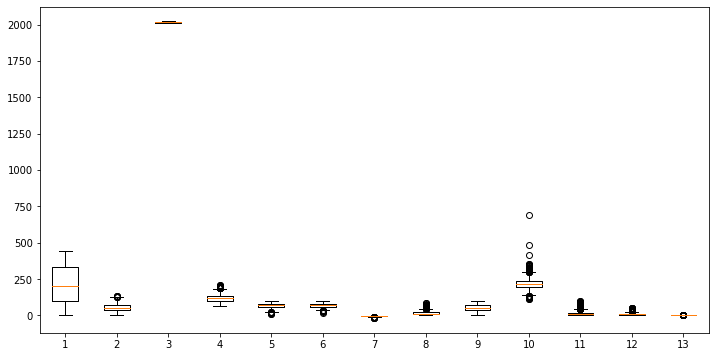

In [481]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(X)
plt.show()

In [482]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X[0:2]

array([[-1.653523  , -0.23023725, -1.81468308,  0.7152911 ,  0.71974499,
        -0.45094756, -0.16893356,  0.379378  , -1.29628842, -0.43503584,
        -0.73806936, -0.43869671, -0.78247567],
       [-1.653523  , -0.23023725, -1.48045218,  0.63903715,  1.22181376,
         0.08372119,  0.8208883 ,  1.34735092,  1.48854108, -0.71209228,
        -0.68665156, -0.22307161, -0.78247567]])

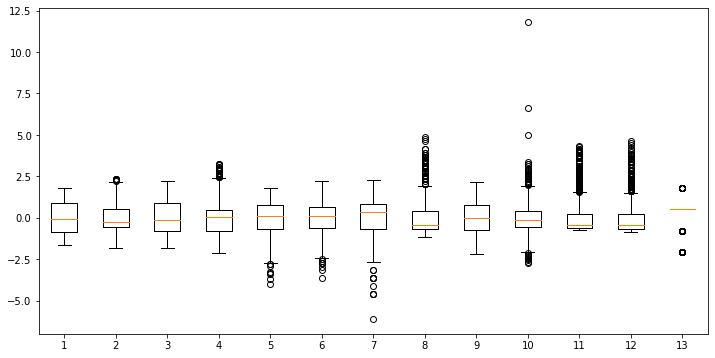

In [483]:
# after normalization of data using min_max scaler
# xticks_values = [0, 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
# print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(X)
# plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()

In [484]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [485]:
from sklearn.tree import DecisionTreeClassifier
poplTree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [486]:
poplTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [487]:
predPoplTree = poplTree.predict(x_test)

In [488]:
print(predPoplTree[0:5])
print(y_test[0:5])

[0 1 1 0 1]
[1 1 0 0 1]


In [489]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predPoplTree))

DecisionTrees's Accuracy:  0.6636363636363637


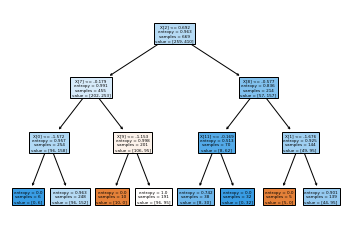

In [490]:
import sklearn.tree as tree

fig = tree.plot_tree(poplTree, filled=True)
plt.show()